# DDoS: Security metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# data source: https://surfdrive.surf.nl/files/index.php/s/CZWfWQp3VKGKa8m
df = pd.read_csv('data_with_ports.csv.gz', sep='|', compression='gzip')

C:\Users\newbi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15,17,19,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# parse string to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['start_time'] = pd.to_datetime(df['start_time'], format='%Y-%m-%dT%H:%M:%S+09:00')
df['stop_time'] = pd.to_datetime(df['stop_time'], format='%Y-%m-%dT%H:%M:%S+09:00')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5721432 entries, 0 to 5721431
Data columns (total 35 columns):
target_ip                 object
date                      datetime64[ns]
sensor_id                 object
service                   object
start_time                datetime64[ns]
stop_time                 datetime64[ns]
duration                  float64
packets                   int64
raw_country               object
raw_as                    object
raw_hostname              object
udp_port_list             object
pyasn_as                  float64
pyasn_as_bgp_size         float64
cc                        object
region                    object
is_oecd                   float64
as_type                   object
as_type_confidence        float64
tg_op                     object
org                       object
org_range                 object
org_rangesize             float64
org_ipsize_seen           float64
org_domainsize_seen       float64
org_ipsize_seen_shared    float

In [6]:
df.head()

,target_ip,date,sensor_id,service,start_time,stop_time,duration,packets,raw_country,raw_as,...,org_ipsize_seen_shared,org_is_hosting,org_tag,caida_type,dc,subs,as_ipsize_seen,as_domainsize_seen,pps,year
0,1.0.131.184,2014-08-02,sensor001,dns,2014-08-02 22:32:18,2014-08-02 22:37:15,297.0,609,Thailand,AS9737 TOT Public Company Limited,...,591.0,1.0,NaN,Transit/Access,0,1593000.0,405292.0,1408.0,2.050505,2014
1,1.0.131.184,2014-08-02,sensor003,dns,2014-08-02 22:32:20,2014-08-02 22:37:18,298.0,602,Thailand,AS9737 TOT Public Company Limited,...,591.0,1.0,NaN,Transit/Access,0,1593000.0,405292.0,1408.0,2.020134,2014
2,1.1.0.1,2014-07-01,sensor007,chg,2014-07-01 16:20:55,2014-07-01 16:21:24,29.0,494,China,None,...,2315.0,0.0,other,NaN,0,NaN,NaN,NaN,17.034483,2014
3,1.1.1.1,2014-01-10,sensor001,chg,2014-01-10 23:50:48,2014-01-10 23:56:46,358.0,331,Australia,AS15169 Google Inc.,...,6502.0,1.0,NaN,Content,2416,NaN,84522.0,4105765.0,0.924581,2014
4,1.1.1.1,2014-01-11,sensor001,chg,2014-01-11 01:11:09,2014-01-11 01:14:17,188.0,576,Australia,AS15169 Google Inc.,...,6502.0,1.0,NaN,Content,2416,NaN,84522.0,4105765.0,3.063830,2014


In [37]:
df.iloc[1]

target_ip                                                       1.0.131.184
date                                                    2014-08-02 00:00:00
sensor_id                                                         sensor003
service                                                                 dns
start_time                                              2014-08-02 22:32:20
stop_time                                               2014-08-02 22:37:18
duration                                                                298
packets                                                                 602
raw_country                                                        Thailand
raw_as                                    AS9737 TOT Public Company Limited
raw_hostname                             node-qg.pool-1-0.dynamic.totbb.net
udp_port_list                                                          [80]
pyasn_as                                                              23969
pyasn_as_bgp

## 0. General Overview Dataset

In [10]:
# Countries
unique_countries = df['raw_country'].unique()
len(unique_countries)

216

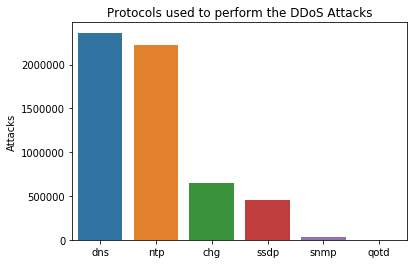

In [55]:
# Services

x_services = df["service"].value_counts().index.tolist()
y_services = df["service"].value_counts()
ax = sns.barplot(x_services, y_services)
ax.set_title("Protocols used to perform the DDoS Attacks")
ax.set_ylabel("Attacks")
# ax.figure.savefig("protocols.png")

plt.show()

In [104]:
y_services.divide(y_services.sum()) * 100

dns     41.296322
ntp     38.762656
chg     11.249719
ssdp     8.022712
snmp     0.651515
qotd     0.017076
Name: service, dtype: float64

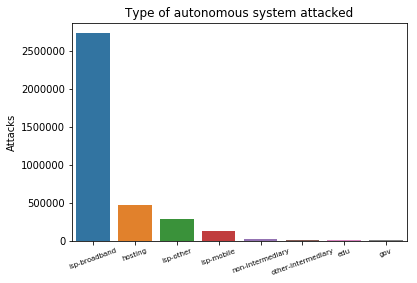

In [72]:
# AS_Types

x_type = df["as_type"].value_counts().index.tolist()
y_type = df["as_type"].value_counts()
ax = sns.barplot(x_type, y_type)
ax.set_xticklabels(x_type, rotation = 20, fontsize = 7)
ax.set_title("Type of autonomous system attacked")
ax.set_ylabel("Attacks")
# ax.set_yscale('log')
ax.figure.savefig("type_as.png")

plt.show()

In [107]:
raw_as_count

as_type
edu                   109
gov                    22
hosting               217
isp-broadband         753
isp-mobile            247
isp-other             653
non-intermediary       39
other-intermediary     14
Name: raw_as, dtype: int64

In [106]:
y_raw_as

as_type
edu                   109
gov                    22
hosting               217
isp-broadband         753
isp-mobile            247
isp-other             653
non-intermediary       39
other-intermediary     14
Name: raw_as, dtype: int64

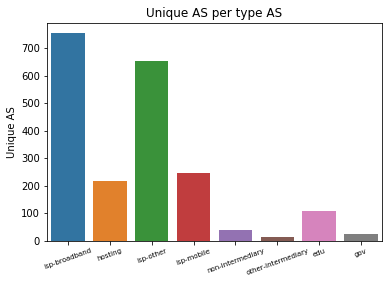

In [111]:
raw_as_count = df.drop_duplicates(["raw_as"]).groupby("as_type")["raw_as"].count()

x_raw_as = raw_as_count.index.tolist()
y_raw_as = raw_as_count
ax = sns.barplot(x_raw_as, y_raw_as, order = x_type)
ax.set_xticklabels(x_type, rotation = 20, fontsize = 7)
ax.set_title("Unique AS per type AS")
ax.set_ylabel("Unique AS")
ax.figure.savefig("type_as_unique.png")

plt.show()

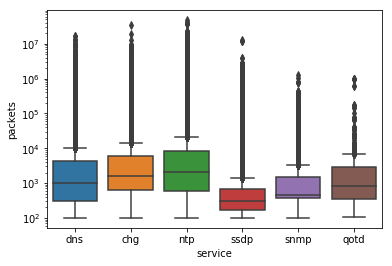

In [51]:
ax = sns.boxplot(x = "service", y = "packets", data = df)
ax.set_yscale('log')

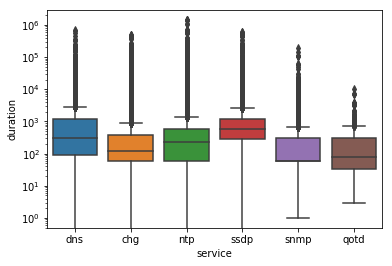

In [52]:
ax = sns.boxplot(x = "service", y = "duration", data = df)
ax.set_yscale('log')

## 1. Top N Countries with most incidents

In [ ]:
# top N countries with most incidents
N = 5

# list out the top N countries with most incidents
topNcountries = df.cc.value_counts()[:N].index.to_list()

# count the daily incident frequency for each country
df_countries = df[["cc", "date"]].groupby("date").cc.value_counts().to_frame()
df_countries.columns = ["counts"]
df_countries.reset_index(inplace=True)

# filter only the top N countries
df_countries = df_countries[df_countries['cc'].isin(topNcountries)]
df_countries.columns = ["Date", "Country", "# of Incidents per day"]

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(x="Date", y="# of Incidents per day", hue="Country", data=df_countries)
ax.set_title("# of DDoS attacks per day, per country\n(top %i countries with most total # of incidents)" % N)
fig.autofmt_xdate() # formatting datetime xlabel

## 2. Sensor ID vs Service type

In [ ]:
df_sensorsAndService = df[["sensor_id", "service"]].groupby("sensor_id").service.value_counts().to_frame()
df_sensorsAndService.columns = ["counts"]
df_sensorsAndService.reset_index(inplace=True)

In [ ]:
df_sensorsAndService = df_sensorsAndService.pivot("sensor_id", "service", "counts")
df_sensorsAndService.fillna(0, inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(df_sensorsAndService, annot=True, fmt=".0f", cmap="YlGnBu")
ax.set_title("# of attacks: sensor id vs service type")